<a href="https://colab.research.google.com/github/shoabahamed/khanacademy-statistics-and-probability/blob/main/differentways_to_find_best_fitline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<p>Creating fake datas where x is Area of a building and y is The Price corrospoding to it</p>

In [26]:
datas = {'Area': [15, 20, 22, 23, 24, 25, 28, 30 , 35, 39, 40, 43, 45, 50],
            'Price': [200, 260, 354, 376, 335, 380, 459, 530, 600, 685, 700, 735, 800, 955]}

df = pd.DataFrame(datas)
df.head()

,Area,Price
0,15,200
1,20,260
2,22,354
3,23,376
4,24,335


In [27]:
x = df['Area']
y = df['Price']

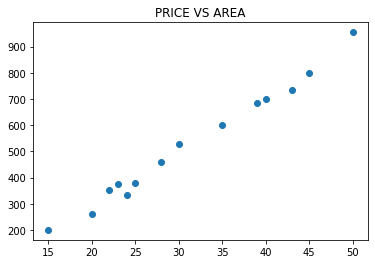

In [28]:
plt.scatter(x, y)
plt.title('PRICE VS AREA')
plt.show()

<P>Lets write a function to calculate the mean squared error first</p>

In [5]:
def mean_squared_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    sqrt_error = np.square(y_true - y_pred)
    return np.mean(sqrt_error)

mean_squared_error([1, 2, 3], [3, 4, 5])

4.0

<P>First we will try to find the best fit line through the equation derived 
</P>

In [6]:
def get_slope(x, y):

    x = np.array(x)
    y = np.array(y)

    x_square = np.square(x)
    xy = x*y

    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_square_mean = np.mean(x_square)
    xy_mean = np.mean(xy)

    nominator = (xy_mean/x_mean) - y_mean
    denominator = (x_square_mean/x_mean) - x_mean
    return nominator/denominator

def get_intercept(x, y):
    x = np.array(x)
    y = np.array(y)

    y_mean = np.mean(y)
    x_mean = np.mean(x)
    slope = get_slope(x, y)

    intercept = y_mean - (x_mean * slope)

    return intercept


In [29]:
slope = get_slope(x, y)
intercept = get_intercept(x, y)

print(f'The slope of the equation though direct equation is {slope} and the intercept is {intercept}')

The slope of the equation though direct equation is 20.936173299163507 and the intercept is -130.14143416662705


In [8]:
def predicted_y(x):
    y_pred = slope * x + intercept
    return y_pred


In [30]:
y_pred_dir = predicted_y(x)

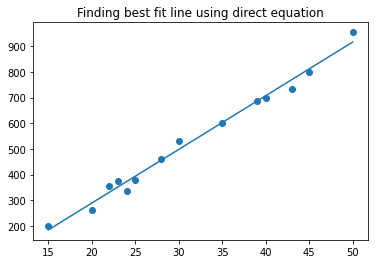

In [31]:
plt.scatter(x, y)
plt.plot(x, y_pred_dir)
plt.title('Finding best fit line using direct equation')
plt.show()

In [109]:
print(f'Total mean squared error with direct equation {mean_squared_error(y, y_pred_dir)}')

Total mean squared error with direct equation 553.5497385453863


<h2>Now lets try finds the best fit line using gradient discent</h2>

In [37]:
def gradient_descent(x, y_true, learning_rate=0.01, threshold=600, epochs=30):
    x = np.array(x)
    y_true = np.array(y_true)

    x_squared_mean = np.mean(np.square(x))
    x_mean = np.mean(x)

    w = 0
    bias = 1

    for i in range(epochs):
        y_pred = w * x + bias
        error = mean_squared_error(y_true, y_pred)

        xy_pred_mean = np.mean(x * y_pred)
        y_pred_mean = np.mean(y_pred)
        
        w_d = -xy_pred_mean + w * x_squared_mean + bias * x_mean
        bias_d = -y_pred_mean + w * x_mean + bias

        print(bias_d)
        print(w_d)
        w = w - learning_rate * w_d
        bias = bias - learning_rate * bias_d

        print(f'The total mean square error is {error}')
        print(y_pred_mean, xy_pred_mean, x_mean, x_squared_mean)
        if error < threshold:
            break

    return w, bias

In [38]:
gradient_descent(x, y, learning_rate=0.3, epochs=2, threshold=6)

0.0
0.0
The total mean square error is 322803.5
1.0 31.357142857142858 31.357142857142858 1088.7857142857142
0.0
0.0
The total mean square error is 322803.5
1.0 31.357142857142858 31.357142857142858 1088.7857142857142


(0.0, 1.0)

We can see that the values are not changing because although we doing derivative of the same MSE error we are assuming the diff with respect to m or b will the 0 so is w_d and bias_d will alwasy gives 0

<p>So we to partially dif MSE equation from the most basic equation without doing any algebric equation manipulation and thiking that diff with respect to m would be 0 and </p>

In [99]:
from math import isclose

isclose(5.3333333334, 5.33333)

False

In [42]:
def gradient_descent(x, y_true, learning_rate=0.001, threshold=600, epochs=30):
    x = np.array(x)
    y_true = np.array(y_true)

    w = 0
    bias = 1
    n = len(x)

    for index in range(epochs):
        y_pred = w * x + bias
        error = mean_squared_error(y_true, y_pred)

        w_d =   -(2/n) * sum(x * (y_true- y_pred))
        bias_d = -(2/n) * sum(y_true - y_pred)

        w = w -  learning_rate * w_d
        bias = bias - learning_rate * bias_d
        if index % 30 == 0:
            print(f'The total mean square error is {error} and slope {w}, bias {bias}')

        if error < threshold:
            break

        prev_error = error

    return w, bias

In [47]:
gradient_descent(x, y, learning_rate=0.01, epochs=90, threshold=1)

The total mean square error is 322803.5 and slope 373.6557142857143, bias 11.507142857142856
The total mean square error is 3.8188059016224566e+84 and slope 1.2304553507267576e+42, bias 3.5440395132885833e+40
The total mean square error is 4.5491615031128645e+163 and slope 4.246858042502894e+81, bias 1.2232083594961738e+80


(-7.04914157868154e+119, -2.0303407413245184e+118)

<p>Okay what is happening is pretty confusing as despite everything being okay with each iteration rather than MSE going down it is only increasing. <br>
Well the reason it is happening is that we did not scaled our data
before doing gradient discent.<br>
So lets do that</p>

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaled_x = scaler_x.fit_transform(x.values.reshape(len(x), 1))
scaled_y = scaler_y.fit_transform(y.values.reshape(len(x), 1))
scaled_y.flatten()

array([0.        , 0.0794702 , 0.20397351, 0.23311258, 0.17880795,
       0.2384106 , 0.34304636, 0.43708609, 0.52980132, 0.64238411,
       0.66225166, 0.70860927, 0.79470199, 1.        ])

In [57]:
scaler_y.inverse_transform(scaled_y).flatten()

array([200., 260., 354., 376., 335., 380., 459., 530., 600., 685., 700.,
       735., 800., 955.])

In [60]:
scaled_x = scaled_x.reshape(len(x), )
scaled_y = scaled_y.reshape(len(y), )

In [101]:
w, bias = gradient_descent(scaled_x, scaled_y, learning_rate=0.5, epochs=300, threshold=0.0004)

The total mean square error is 0.4044350185142256 and slope -0.1817326665765644, bias 0.43226111636707676
The total mean square error is 0.0025717734556494434 and slope 0.8446341122581037, bias 0.04193673559499176
The total mean square error is 0.0009919949398756497 and slope 0.9561637191993917, bias -0.014094862754007523
The total mean square error is 0.0009713701294912133 and slope 0.9689071701658803, bias -0.02049707240682509
The total mean square error is 0.0009711008621229419 and slope 0.9703632457944872, bias -0.0212285933636847
The total mean square error is 0.0009710973467007757 and slope 0.9705296180151516, bias -0.021312177460323774
The total mean square error is 0.0009710973008051542 and slope 0.970548627821555, bias -0.021321727837719528
The total mean square error is 0.0009710973002059629 and slope 0.9705507998953429, bias -0.02132281907052666
The total mean square error is 0.000971097300198141 and slope 0.9705510480780143, bias -0.021322943755551084
The total mean square 

In [111]:
y_pred_gradient = w * scaled_x + bias
y_pred_grad = scaler_y.inverse_transform(y_pred_gradient.reshape(len(y_pred_gradient), 1)).flatten()
y_pred_grad = [round(value) for value in y_pred_grad]
y_pred_grad

[184, 289, 330, 351, 372, 393, 456, 498, 603, 686, 707, 770, 812, 917]

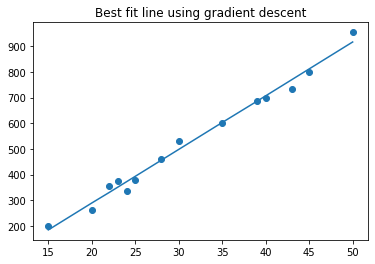

In [112]:
plt.scatter(x, y)
plt.plot(x, y_pred_grad)
plt.title('Best fit line using gradient descent')
plt.show()

In [113]:
print(f'The mean square error using gradient descent is {mean_squared_error(y, y_pred_grad)}')

The mean square error using gradient descent is 552.9285714285714


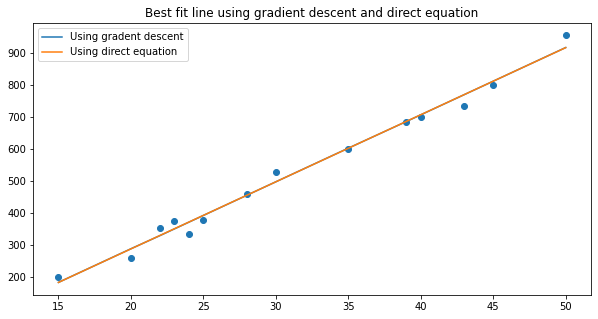

In [117]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(x, y_pred_grad, label='Using gradent descent')
plt.plot(x, y_pred_dir, label='Using direct equation')
plt.title('Best fit line using gradient descent and direct equation')
plt.legend()
plt.show()

In [114]:
print(f'The mean square error using gradient descent is {mean_squared_error(y, y_pred_grad)}')
print(f'The mean square error using direct equation is {mean_squared_error(y, y_pred_dir)}')

The mean square error using gradient descent is 552.9285714285714
The mean square error using direct equation is 553.5497385453863


<p>We can see that in both cases the error and values are mostly same. So to figure out the best fit line both are correct but incase of direct method if we have more than one input or feaures  it becomes very hard to come up with a equation to solve the problem</p>
<p>But if we use gradient descent we can easliy find the best fit line no matter what is the number of features there are</p>
<br>
<h3>So gradient descent is best for finding best fit line</h3>